In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [2]:
boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


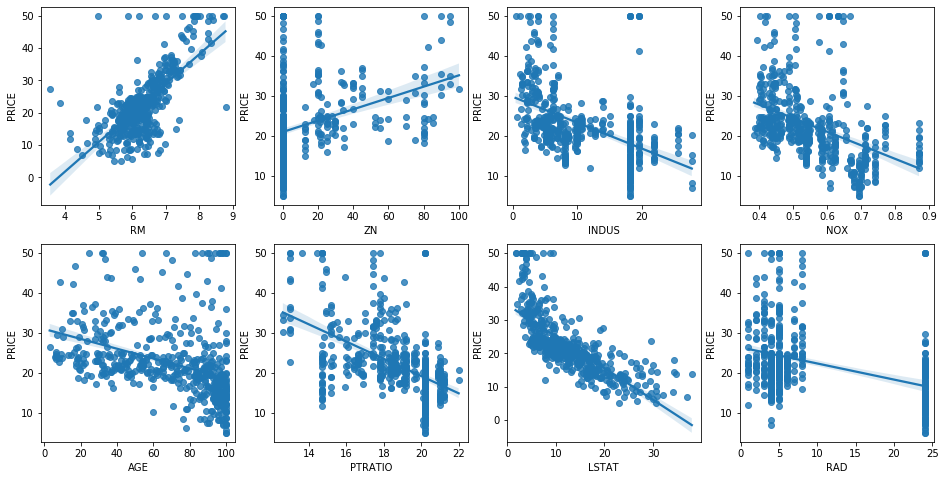

In [4]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = i // 4
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
y_target = bostonDF['PRICE']
x_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state=156)

In [7]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_preds = lr.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(f'MSE: {mse:0.3f}, RMSE: {rmse:0.3f}')
print(f'Variance score: {r2_score(y_test, y_preds):0.3f}')

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


In [8]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164705
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [9]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [10]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print(f'5 folds의 평균 RMSE: {avg_rmse:0.3f}')

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829


In [11]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

x = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 피처')
print(x)

poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print('변환된 2차 다항식 계수 피처')
print(poly_ftr)

일차 단항식 계수 피처
[[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [12]:
def polynomial_func(x):
    y = 1 + 2 * x[:, 0] + 3 * x[:, 0] ** 2 + 4 * x[:, 1] ** 3
    return y

In [13]:
x = np.arange(4).reshape(2, 2)
print('일차 단항식 계수 feature:')
print(x)
y = polynomial_func(x)
print('삼차 다항식 결정값:')
print(y)

일차 단항식 계수 feature:
[[0 1]
 [2 3]]
삼차 다항식 결정값:
[  5 125]


In [14]:
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
print('3차 다항식 계수 feature:')
print(poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수')
print(np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature:
[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

In [16]:
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                 ('linear', LinearRegression())])
x = np.arange(4).reshape(2, 2)
y = polynomial_func(x)

model = model.fit(x, y)
print('Polynomial 회귀 계수')
print(np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [18]:
def true_fun(x):
    return np.cos(1.5 * np.pi * x)

In [19]:
np.random.seed(0)
n_samples = 30
x = np.sort(np.random.rand(n_samples))

y = true_fun(x) + np.random.randn(n_samples) * 0.1

Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다.
Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.0432087498723184 입니다.
Degree 15 회귀 계수는 [-2.98294000e+03  1.03899850e+05 -1.87416981e+06  2.03717199e+07
 -1.44874017e+08  7.09319141e+08 -2.47067173e+09  6.24564702e+09
 -1.15677216e+10  1.56895933e+10 -1.54007040e+10  1.06457993e+10
 -4.91381016e+09  1.35920643e+09 -1.70382078e+08] 입니다.
Degree 15 MSE는 182581084.8263125 입니다.


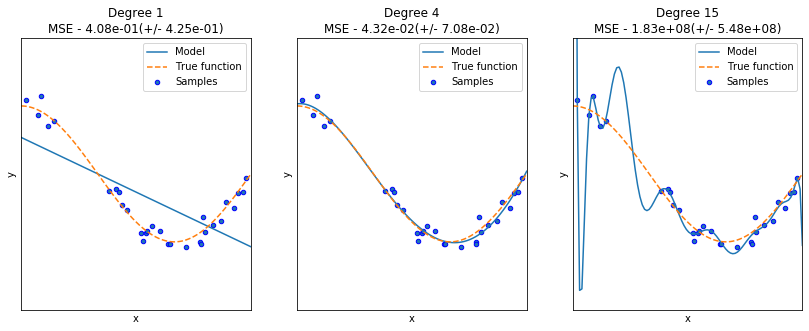

In [20]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(x.reshape(-1, 1), y)
    
    scores = cross_val_score(pipeline, x.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print(f'Degree {degrees[i]} 회귀 계수는 {np.round(coefficients, 2)} 입니다.')
    print(f'Degree {degrees[i]} MSE는 {-1 * np.mean(scores)} 입니다.')
    
    x_test = np.linspace(0, 1, 100)
    
    plt.plot(x_test, pipeline.predict(x_test[:, np.newaxis]), label="Model")
    plt.plot(x_test, true_fun(x_test), '--', label="True function")
    plt.scatter(x, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(f"Degree {degrees[i]}\nMSE - {-scores.mean():0.2e}(+/- {scores.std():.2e})")

plt.show()

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 negative MSE scores: ', np.round(neg_mse_scores, 3))
print('5 folds의 개별 RMSE scores: ', np.round(rmse_scores, 3))
print(f'5 folds의 평균 RMSE: {avg_rmse:0.3f}')

5 folds의 개별 negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
5 folds의 개별 RMSE scores:  [3.38  4.929 5.305 8.637 5.34 ]
5 folds의 평균 RMSE: 5.518


In [29]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print(f'alpha {alpha}일 때, 5 folds의 평균 RMSE: {avg_rmse: 0.3f}')

alpha 0일 때, 5 folds의 평균 RMSE:  5.829
alpha 0.1일 때, 5 folds의 평균 RMSE:  5.788
alpha 1일 때, 5 folds의 평균 RMSE:  5.653
alpha 10일 때, 5 folds의 평균 RMSE:  5.518
alpha 100일 때, 5 folds의 평균 RMSE:  5.330


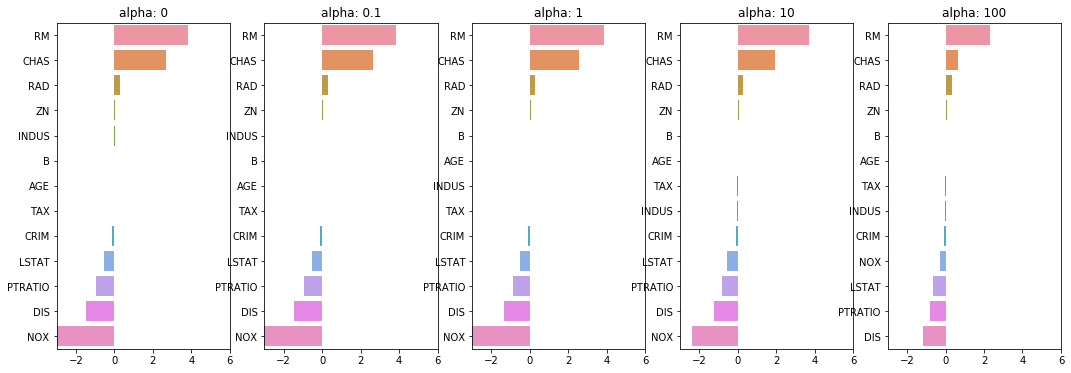

In [30]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_data, y_target)
    
    coeff = pd.Series(data=ridge.coef_, index=x_data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

plt.show()

In [31]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha: ' + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha: 0,alpha: 0.1,alpha: 1,alpha: 10,alpha: 100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [36]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, x_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print('###### ', model_name, '######')
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, x_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        print(f'alpha {param}일 때, 5 폴트 세트의 평균 RMSE: {avg_rmse: 0.3f}')
        model.fit(x_data, y_target)
        coeff = pd.Series(data=model.coef_, index=x_data.columns)
        colname='alpha: ' + str(param)
        coeff_df[colname] = coeff
    return coeff_df

In [37]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, x_data_n=x_data, y_target_n=y_target)

######  Lasso ######
alpha 0.07일 때, 5 폴트 세트의 평균 RMSE:  5.612
alpha 0.1일 때, 5 폴트 세트의 평균 RMSE:  5.615
alpha 0.5일 때, 5 폴트 세트의 평균 RMSE:  5.669
alpha 1일 때, 5 폴트 세트의 평균 RMSE:  5.776
alpha 3일 때, 5 폴트 세트의 평균 RMSE:  6.189


In [38]:
sort_column = 'alpha: ' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [39]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, x_data_n=x_data, y_target_n=y_target)

######  ElasticNet ######
alpha 0.07일 때, 5 폴트 세트의 평균 RMSE:  5.542
alpha 0.1일 때, 5 폴트 세트의 평균 RMSE:  5.526
alpha 0.5일 때, 5 폴트 세트의 평균 RMSE:  5.467
alpha 1일 때, 5 폴트 세트의 평균 RMSE:  5.597
alpha 3일 때, 5 폴트 세트의 평균 RMSE:  6.068


In [40]:
sort_column = 'alpha: ' + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha: 0.07,alpha: 0.1,alpha: 0.5,alpha: 1,alpha: 3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

In [45]:
alphas = [0.1, 1, 10, 100]

scale_methods = [(None, None), ('Standard', None), ('Standard', 2), ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scaled_method in scale_methods:
    x_data_scaled = get_scaled_data(*scaled_method, input_data=x_data)
    print(f'## 변환유형: {scaled_method[0]}, Plynomial Degree: {scaled_method[1]}')
    get_linear_reg_eval('Ridge', params=alphas, x_data_n=x_data_scaled, y_target_n=y_target, verbose=False)

## 변환유형: None, Plynomial Degree: None
alpha 0.1일 때, 5 폴트 세트의 평균 RMSE:  5.788
alpha 1일 때, 5 폴트 세트의 평균 RMSE:  5.653
alpha 10일 때, 5 폴트 세트의 평균 RMSE:  5.518
alpha 100일 때, 5 폴트 세트의 평균 RMSE:  5.330
## 변환유형: Standard, Plynomial Degree: None
alpha 0.1일 때, 5 폴트 세트의 평균 RMSE:  5.826
alpha 1일 때, 5 폴트 세트의 평균 RMSE:  5.803
alpha 10일 때, 5 폴트 세트의 평균 RMSE:  5.637
alpha 100일 때, 5 폴트 세트의 평균 RMSE:  5.421
## 변환유형: Standard, Plynomial Degree: 2
alpha 0.1일 때, 5 폴트 세트의 평균 RMSE:  8.827
alpha 1일 때, 5 폴트 세트의 평균 RMSE:  6.871
alpha 10일 때, 5 폴트 세트의 평균 RMSE:  5.485
alpha 100일 때, 5 폴트 세트의 평균 RMSE:  4.634
## 변환유형: MinMax, Plynomial Degree: None
alpha 0.1일 때, 5 폴트 세트의 평균 RMSE:  5.764
alpha 1일 때, 5 폴트 세트의 평균 RMSE:  5.465
alpha 10일 때, 5 폴트 세트의 평균 RMSE:  5.754
alpha 100일 때, 5 폴트 세트의 평균 RMSE:  7.635
## 변환유형: MinMax, Plynomial Degree: 2
alpha 0.1일 때, 5 폴트 세트의 평균 RMSE:  5.298
alpha 1일 때, 5 폴트 세트의 평균 RMSE:  4.323
alpha 10일 때, 5 폴트 세트의 평균 RMSE:  5.185
alpha 100일 때, 5 폴트 세트의 평균 RMSE:  6.538
## 변환유형: Log, Plynomial Degree: None
al